In [1]:
%autosave 10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
df1 = pd.read_csv('cleaned_data.csv')
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1['LIMIT_BAL'].values.reshape(-1, 1), df1['default payment next month'].values, test_size = 0.2, random_state = 24)

In [336]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 0.1, class_weight = None, dual = False, fit_intercept = True, \

                        intercept_scaling = 1, max_iter = 100, multi_class = 'auto', n_jobs = None, \
                               penalty = 'l2', random_state = None, solver = 'liblinear', tol = 0.0001, \
                               verbose = 0, warm_start = False)
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [8]:
y_pred_proba1 = lr.predict_proba(X_test)
y_pred_proba1

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [9]:
pos_proba1 = y_pred_proba1[:, 1]
pos_proba1

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606566])

(array([280., 509., 414., 538., 587., 610., 412., 491., 782., 710.]),
 array([0.00644178, 0.05409607, 0.10175036, 0.14940464, 0.19705893,
        0.24471322, 0.29236751, 0.34002179, 0.38767608, 0.43533037,
        0.48298465]),
 <a list of 10 Patch objects>)

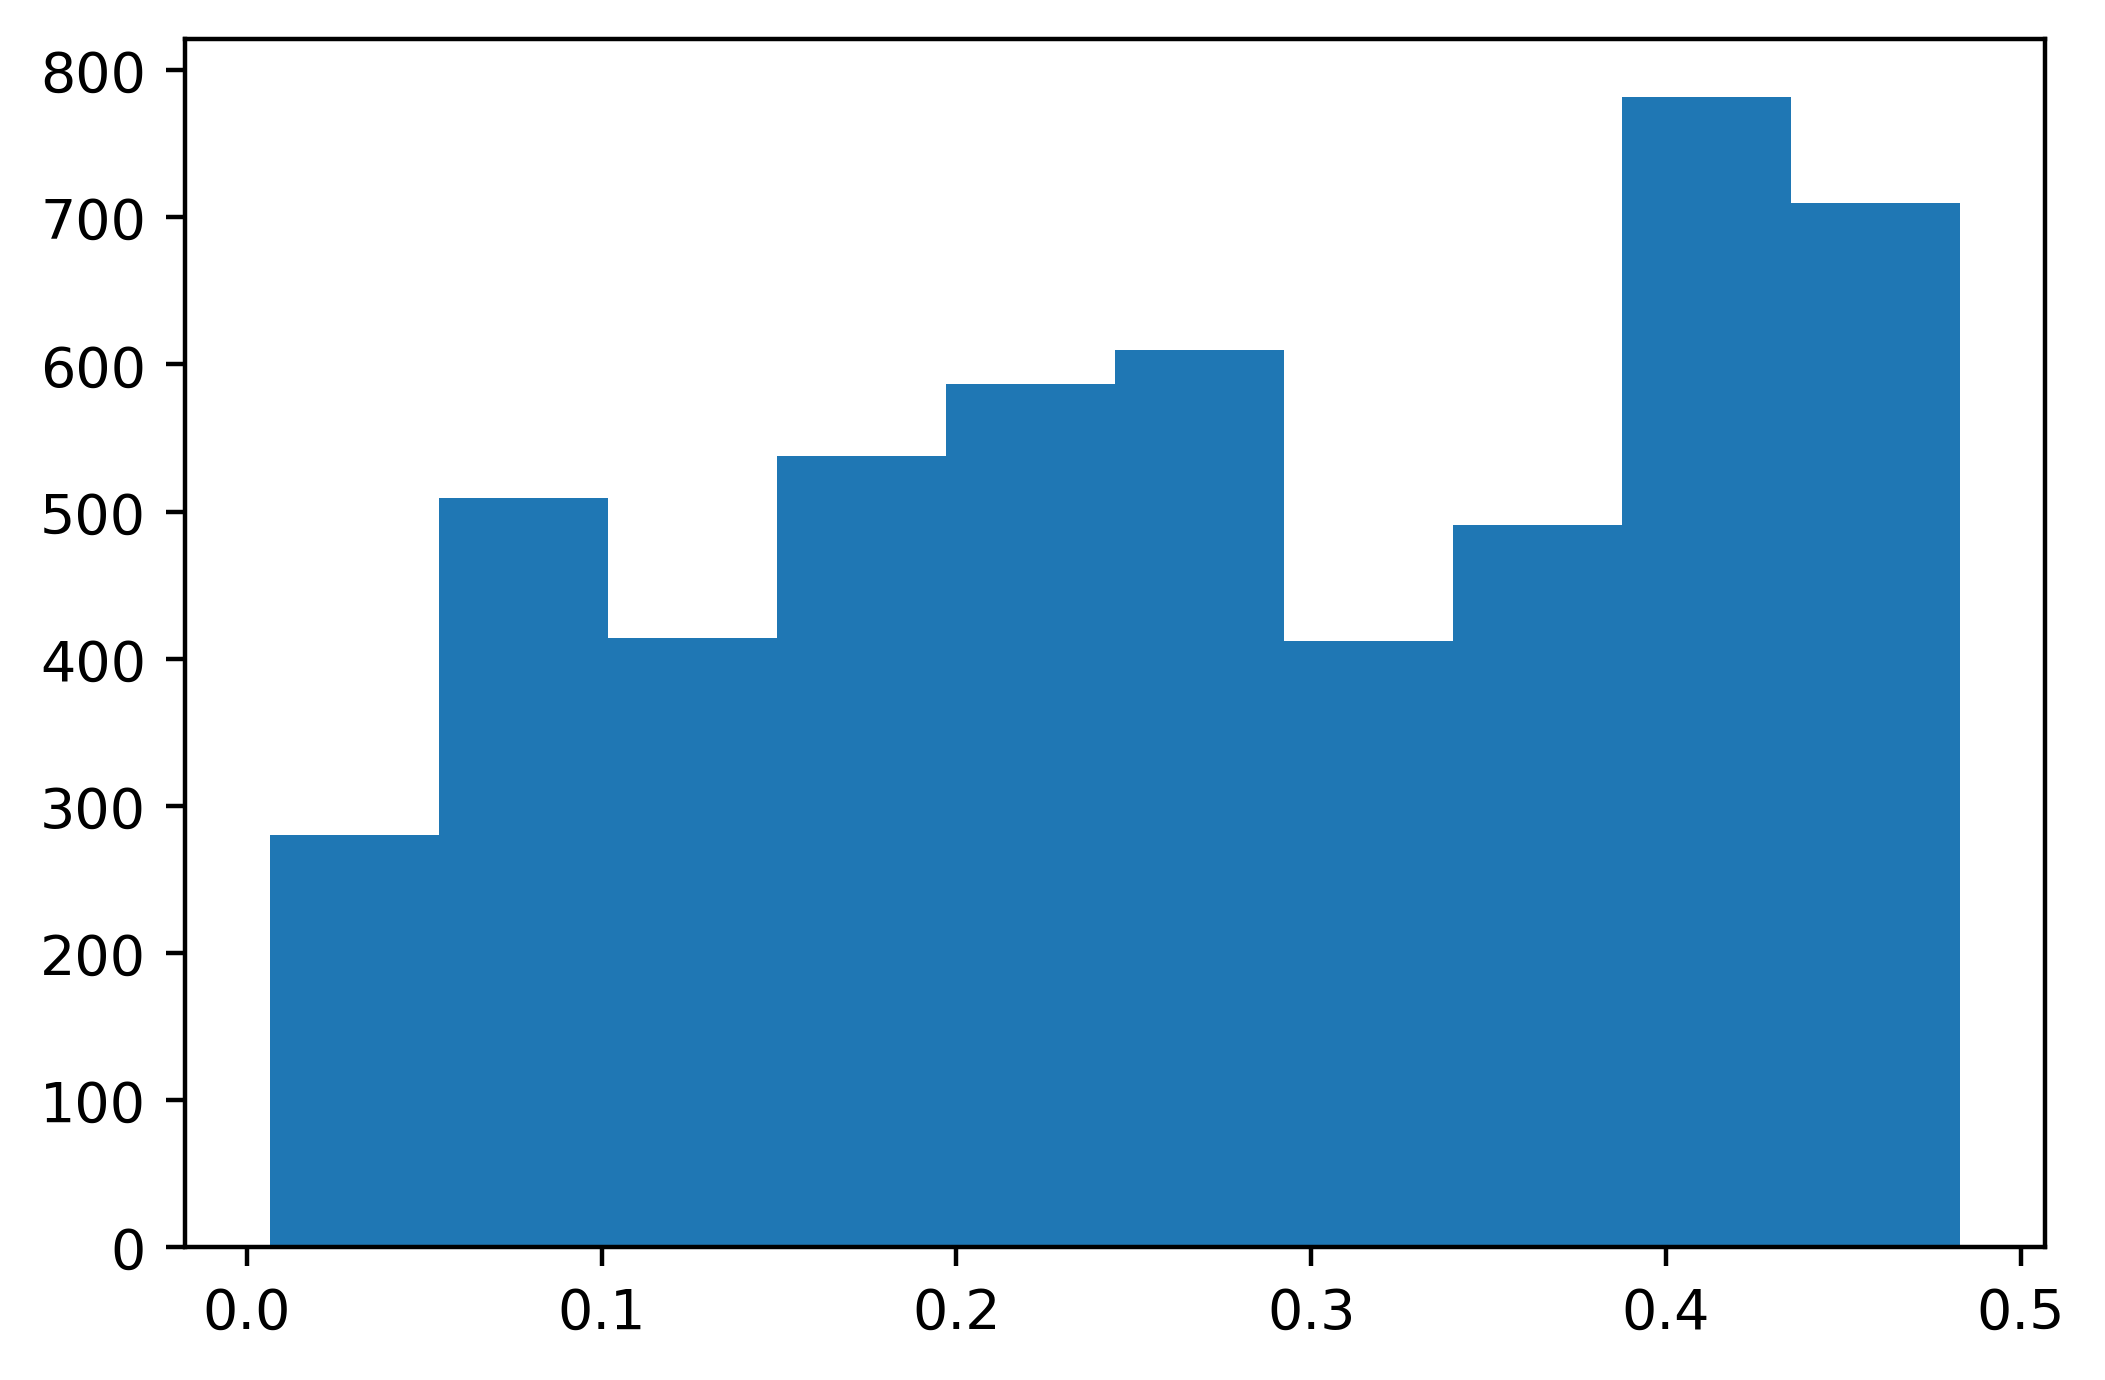

In [10]:
plt.hist(pos_proba1)

In [12]:
from sklearn import metrics
metrics.roc_auc_score(y_test, pos_proba1)

0.6201990844642832

_________________________________________________________________________
**Now, plot the ROC curve.**


In [13]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pos_proba1)

Text(0.5, 1.0, 'ROC curve')

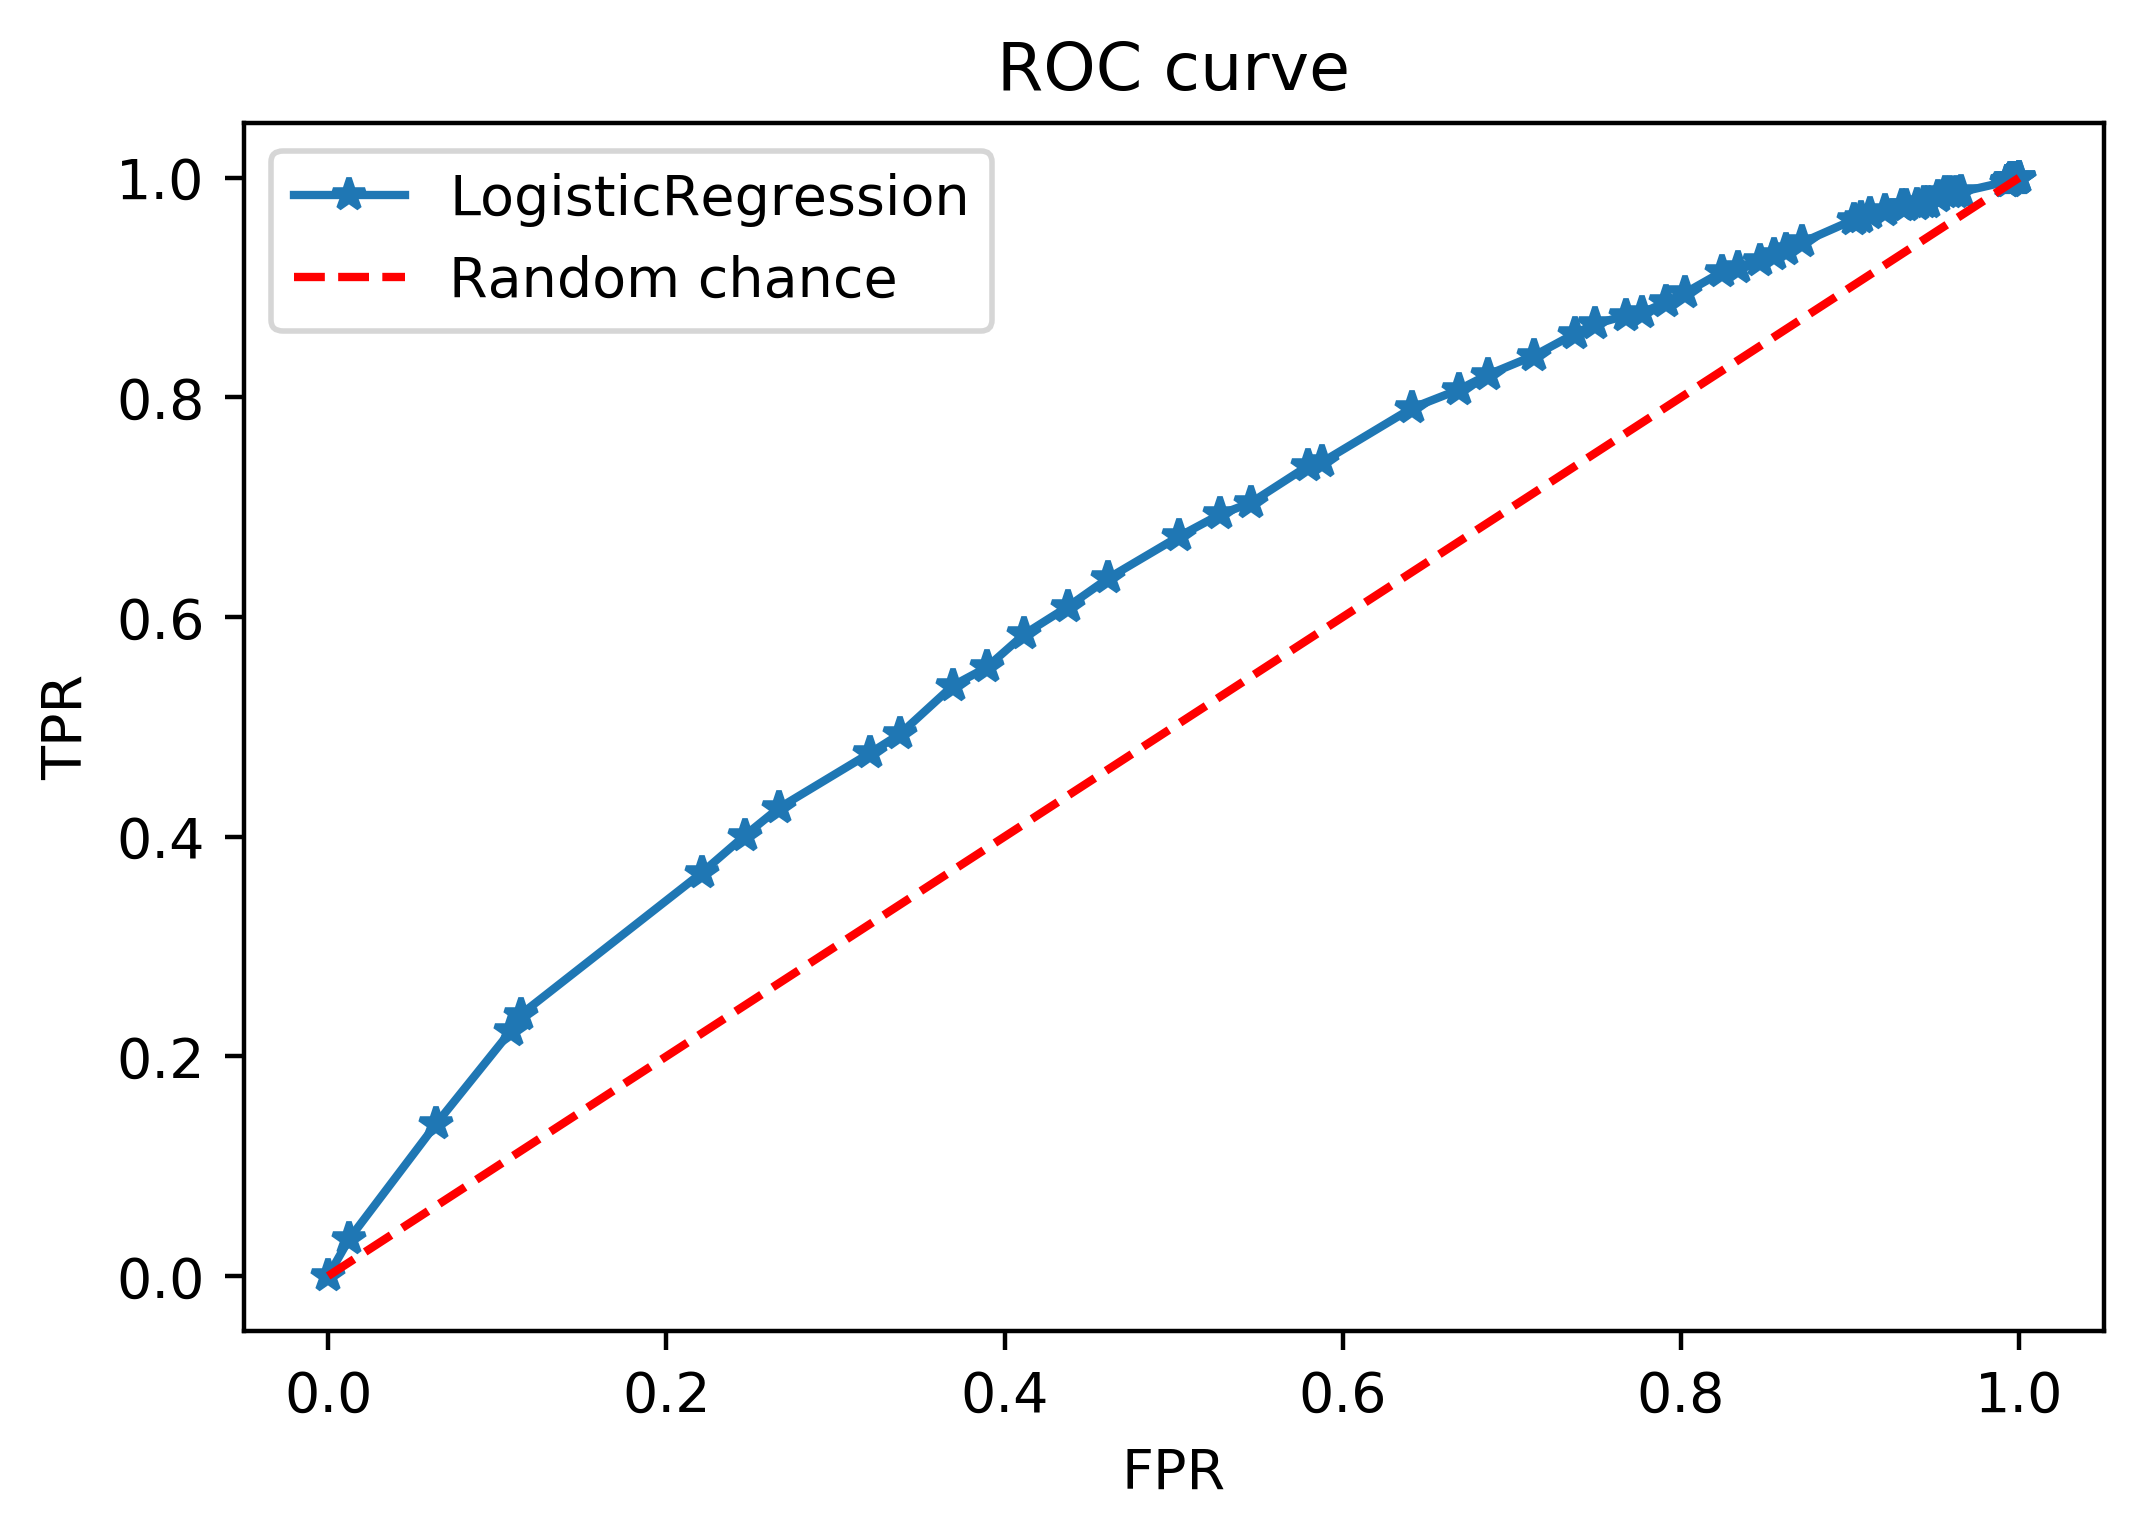

In [14]:
plt.plot(fpr1, tpr1, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['LogisticRegression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [16]:
from sklearn.metrics import precision_recall_curve 
precision, recall, _ = precision_recall_curve(y_test, pos_proba1)

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


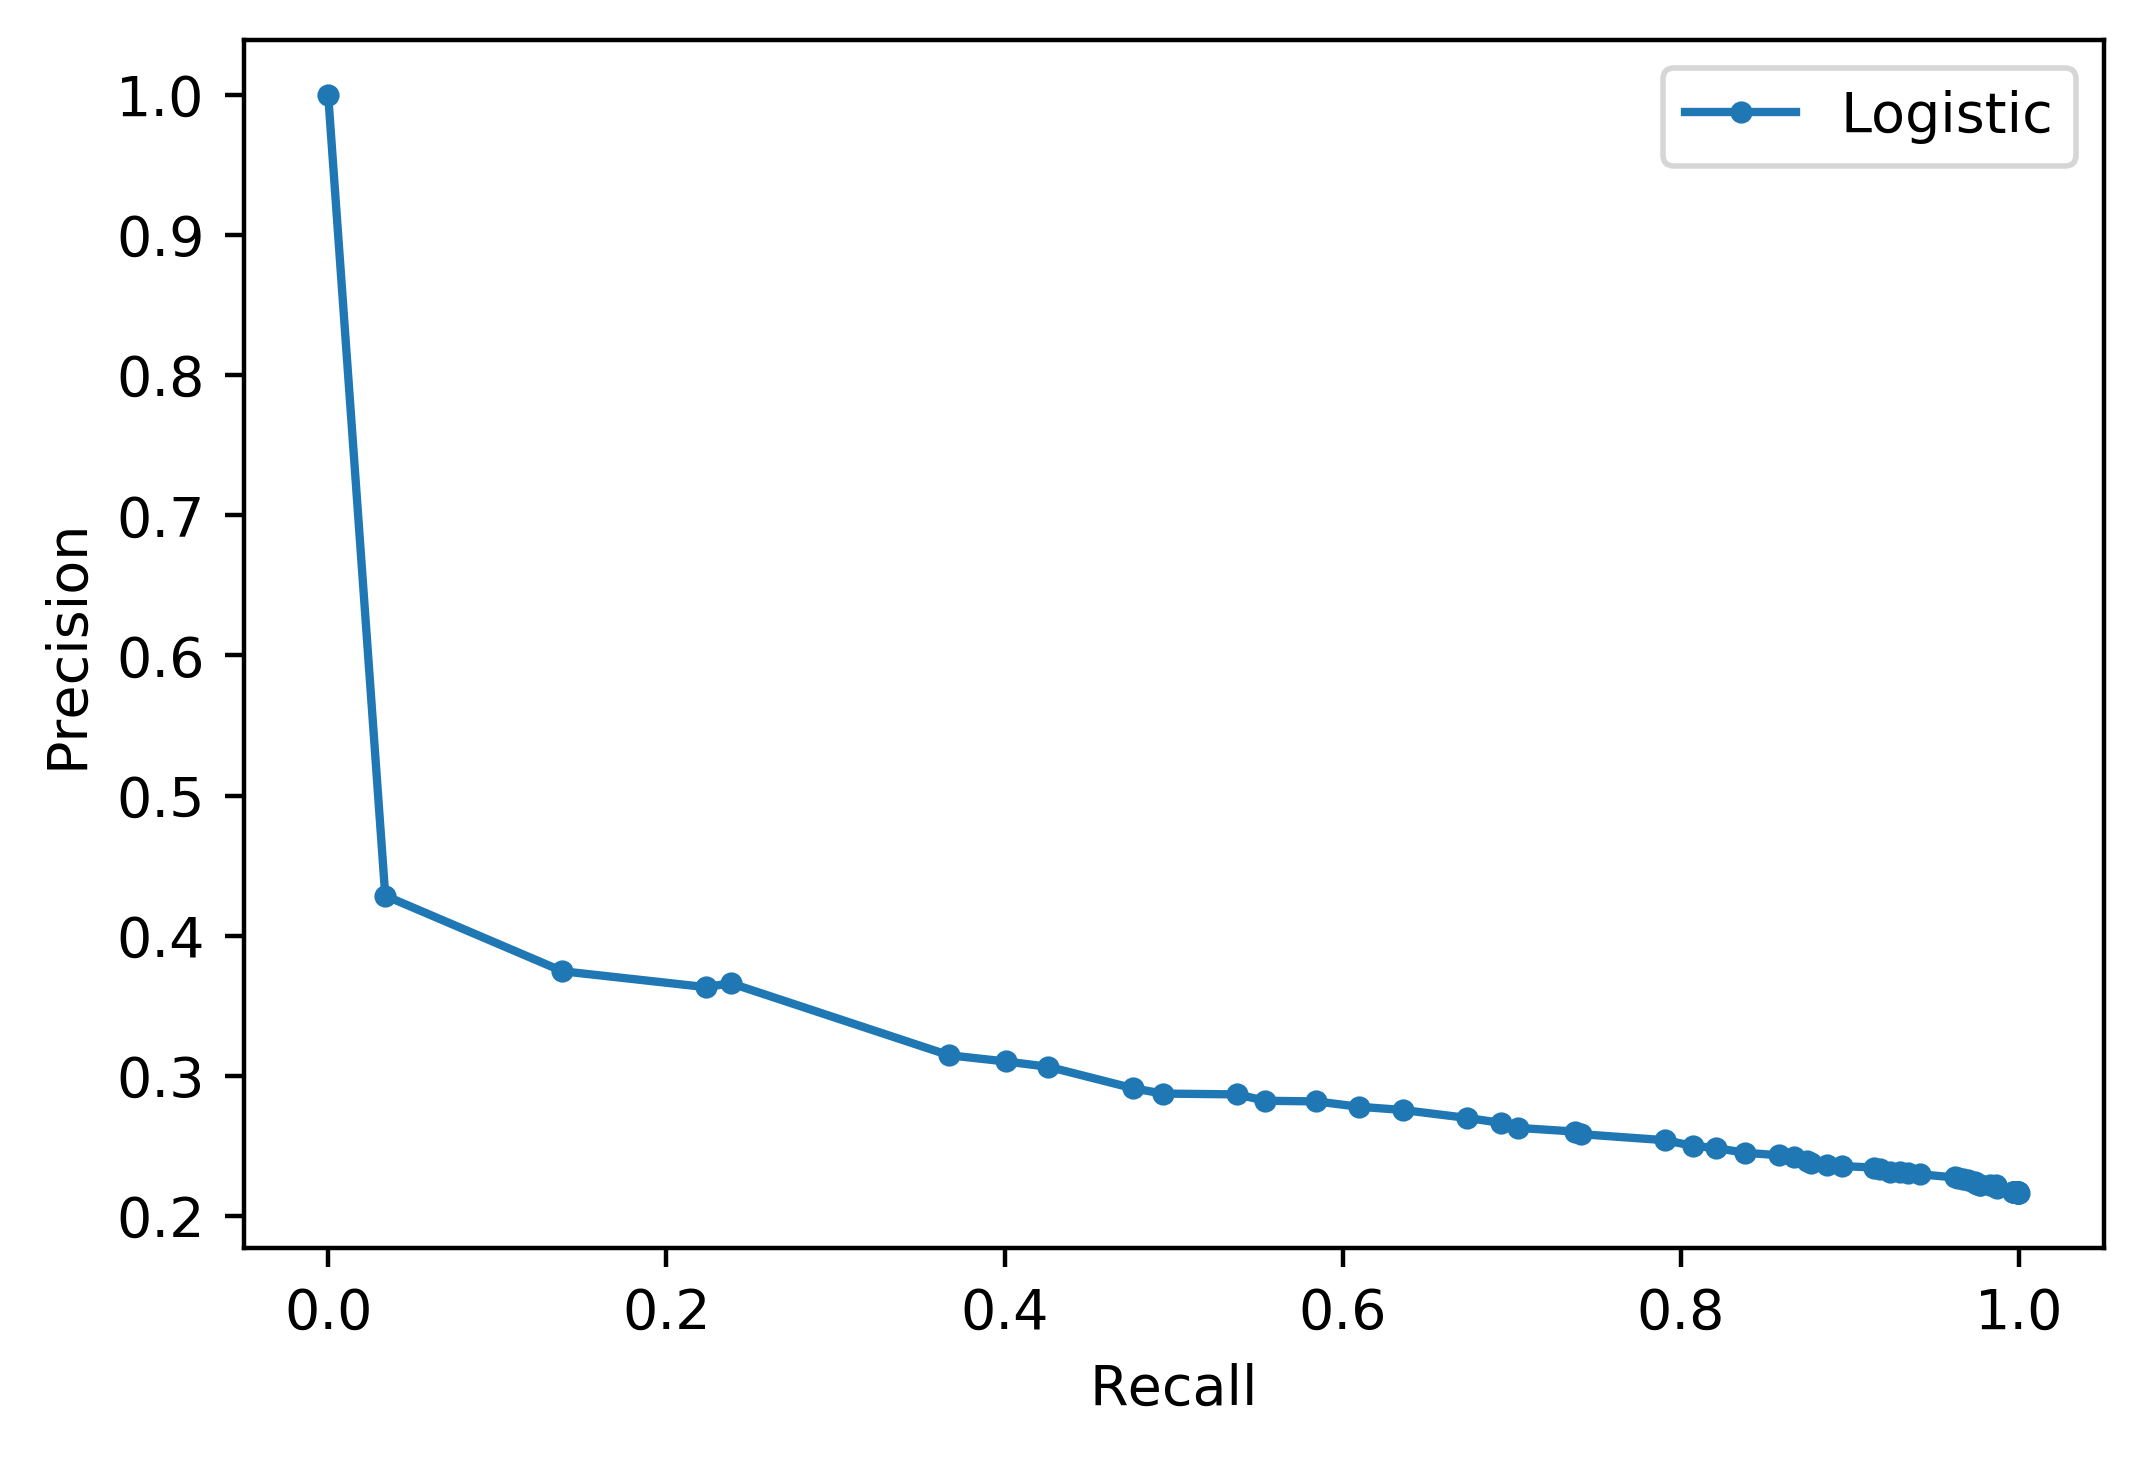

In [17]:
plt.plot(recall, precision, marker = '.', label = 'Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [18]:
from sklearn.metrics import auc
auc_score = metrics.auc(recall, precision)
auc_score

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [19]:
y_pred_proba2 = lr.predict_proba(X_train)
y_pred_proba2

array([[0.69361022, 0.30638978],
       [0.78476701, 0.21523299],
       [0.94581702, 0.05418298],
       ...,
       [0.55088894, 0.44911106],
       [0.73522868, 0.26477132],
       [0.92064596, 0.07935404]])

In [20]:
pos_proba2 = y_pred_proba2[:, 1]
pos_proba2

array([0.30638978, 0.21523299, 0.05418298, ..., 0.44911106, 0.26477132,
       0.07935404])

(array([1106., 1717., 1977., 2074., 2336., 1793., 2168., 2119., 3100.,
        2941.]),
 array([0.00429066, 0.05216006, 0.10002946, 0.14789886, 0.19576826,
        0.24363766, 0.29150706, 0.33937646, 0.38724586, 0.43511526,
        0.48298465]),
 <a list of 10 Patch objects>)

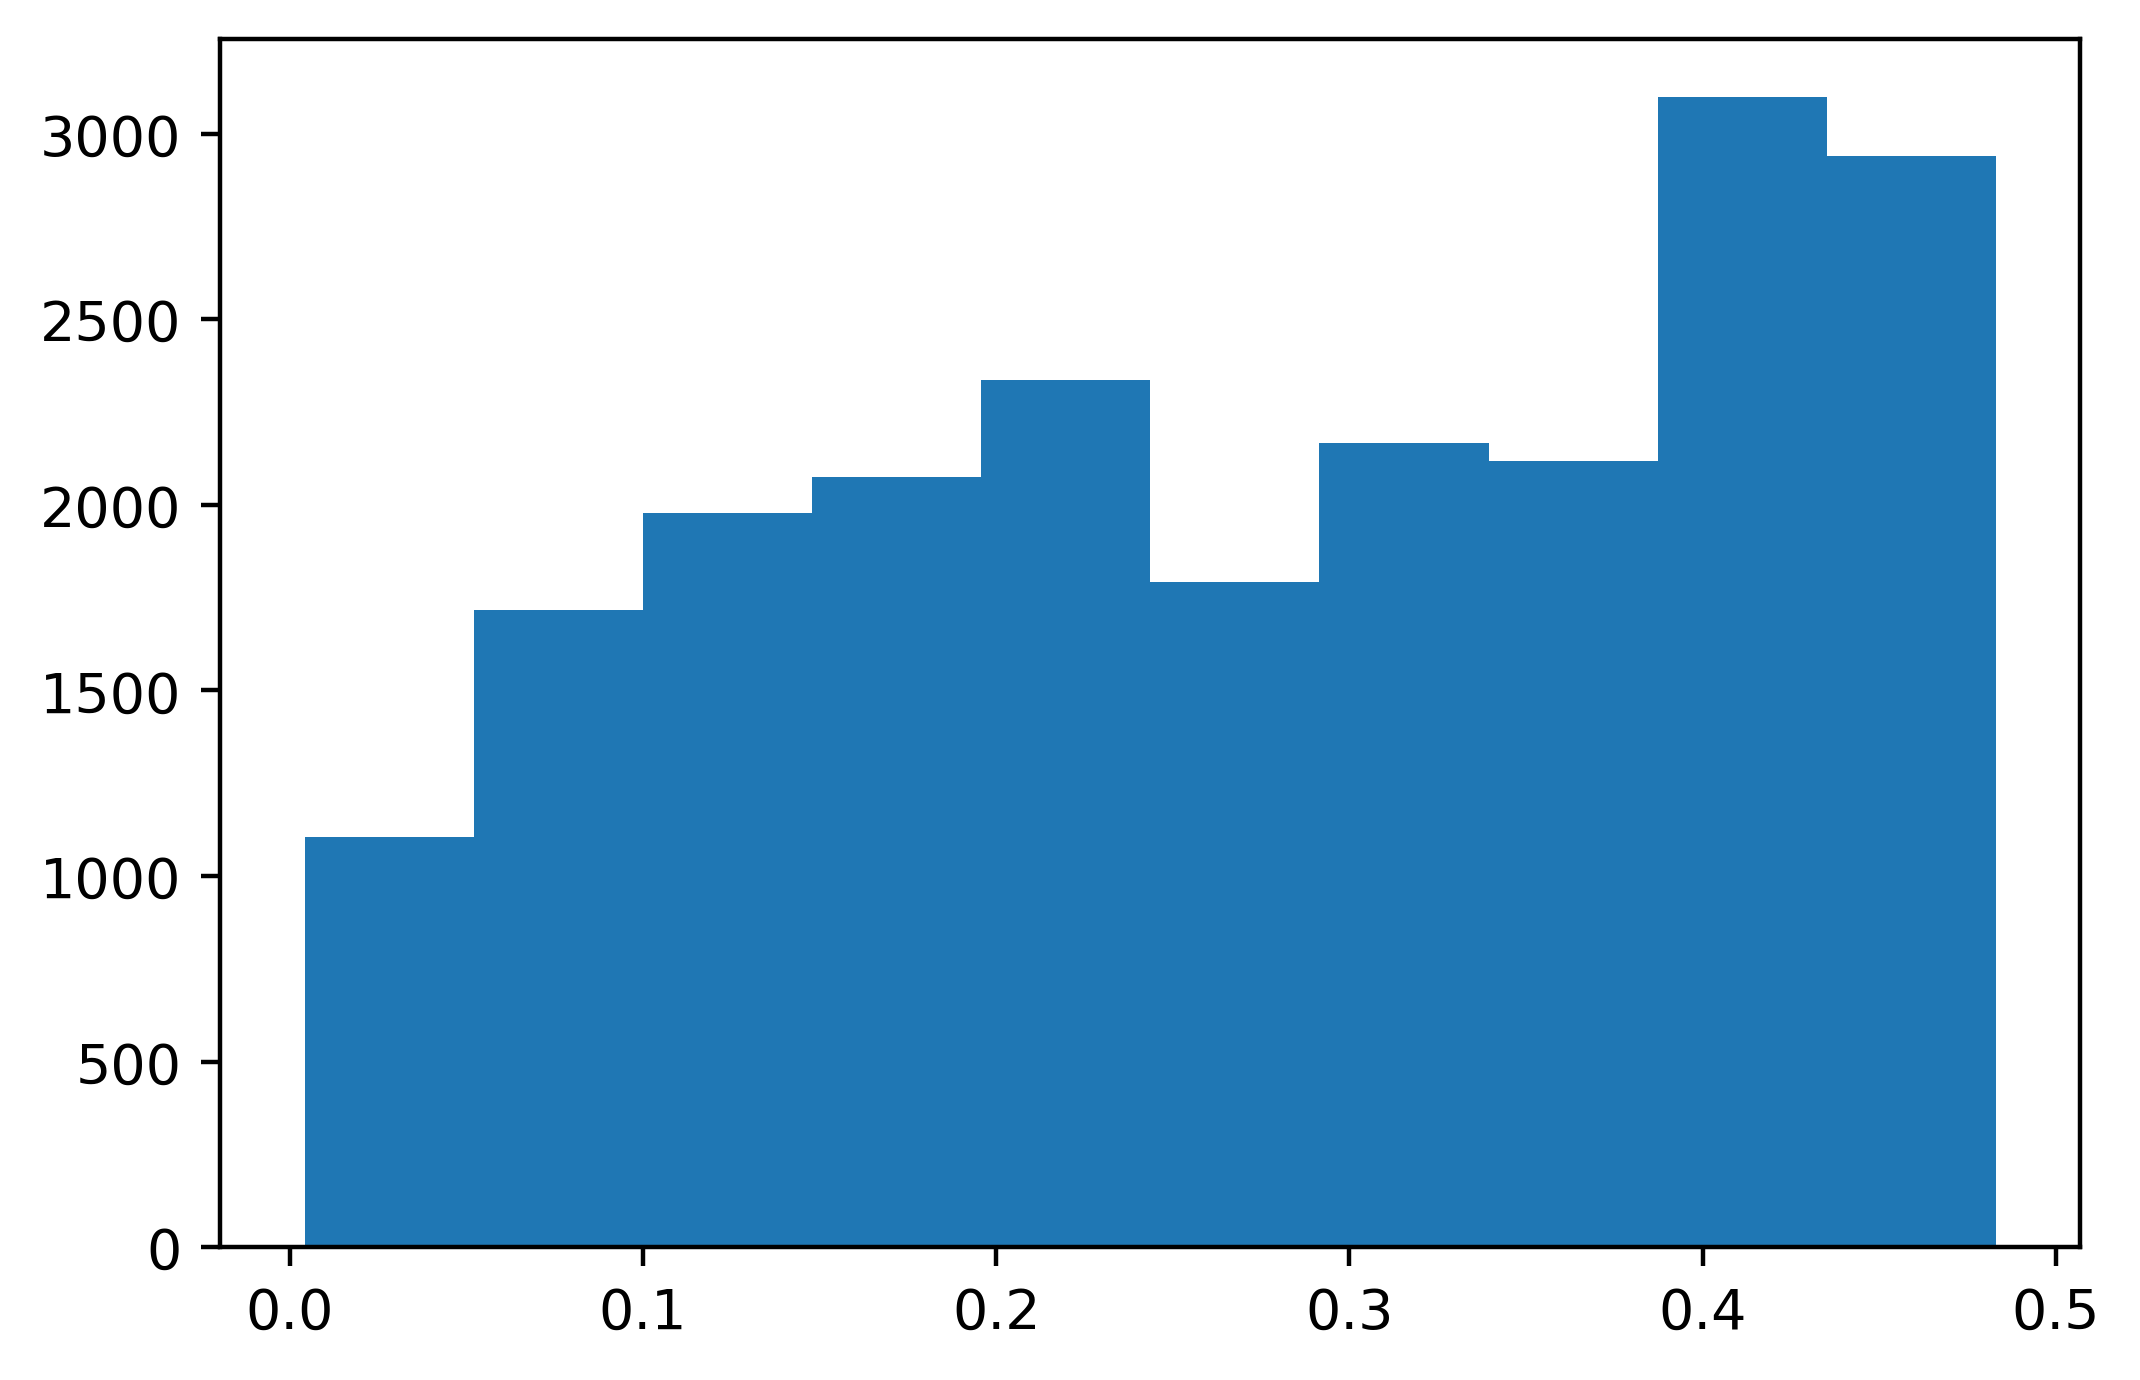

In [21]:
plt.hist(pos_proba2)

In [22]:
metrics.roc_auc_score(y_train, pos_proba2)

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?
